# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.003
-0.003
-0.002
-0.001
0.0
-0.001
-0.002
1.0
1.0
1.0
0.999
1.967
1.969
1.971
1.97
1.97
2.97
2.972
2.974
2.974
2.974
3.977
3.977
3.976
3.976
4.981
4.981
4.98
4.98
5.979
5.982
5.983
5.982
6.51
6.512
6.513
6.513
6.513
7.044
7.045
7.044
7.045
8.052
8.052
8.052
8.051
9.055
9.057
9.059
9.058
9.058
10.066
10.065
10.064
10.065
11.037
11.042
11.042
11.04
11.041
12.047
12.047
12.046
12.046
13.019
13.024
13.023
13.022
13.023
13.902
13.905
13.907
13.906
13.906
14.786
14.789
14.791
14.789
14.79
15.77
15.77
15.77
15.769
16.744
16.747
16.748
16.747
16.748
17.722
17.725
17.726
17.725
17.725
18.704
18.704
18.703
18.703
19.709
19.709
19.709
19.709
20.682
20.684
20.686
20.686
21.262
21.262
21.261
21.84
21.84
21.839
21.839
22.845
22.845
22.844
22.843
23.851
23.851
23.849
23.849
24.854
24.854
24.854
24.853
25.858
25.858
25.856
25.856
26.861
26.86
26.86
26.859
27.865
27.865
27.864
27.863

57.394
57.394
57.394
57.394
57.396
57.396
57.394
57.394
57.394
57.393
57.393
57.393
57.393
57.392
57.392
57.392
57.392
57.391
57.391
57.391
57.391
57.391
57.391
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.39
57.389
57.389
57.389
57.388
57.387
57.432
57.475
57.475
57.518
57.535
57.535
57.535
57.535
57.535
57.535
57.535
57.552
57.552
57.552
57.552
57.552
57.551
57.551
57.551
57.551
57.553
57.552
57.551
57.551
57.551
57.551
57.551
57.55
57.55
57.55
57.55
57.55
57.549
57.549
57.549
57.548
57.548
57.548
57.548
57.548
57.548
57.548
57.548
57.548
57.548
57.547
57.548
57.548
57.548
57.548
57.548
57.547
57.547
57.547
57.547
57.669
57.669
57.669
57.669
57.669
57.669
57.668
57.668
57.668
57.667
57.691
57.691
57.691
57.691
57.691
57.691
57.692
57.692
57.691
57.69
57.69
57.69
57.69
57.69
57.69
57.69
57.69
57.689
57.689
57.689
57.689
57.688
57.688
57.688
57.688
57.687
57.687
57.687
57.686
57.686
57.686
57.686
57.686
57.686
57.686
57.687
57.687
57.687
57.687
57.686
57.6

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1575,3150,59.561
1576,3152,59.561
1577,3154,59.560
1578,3156,59.560


<IPython.core.display.Javascript object>


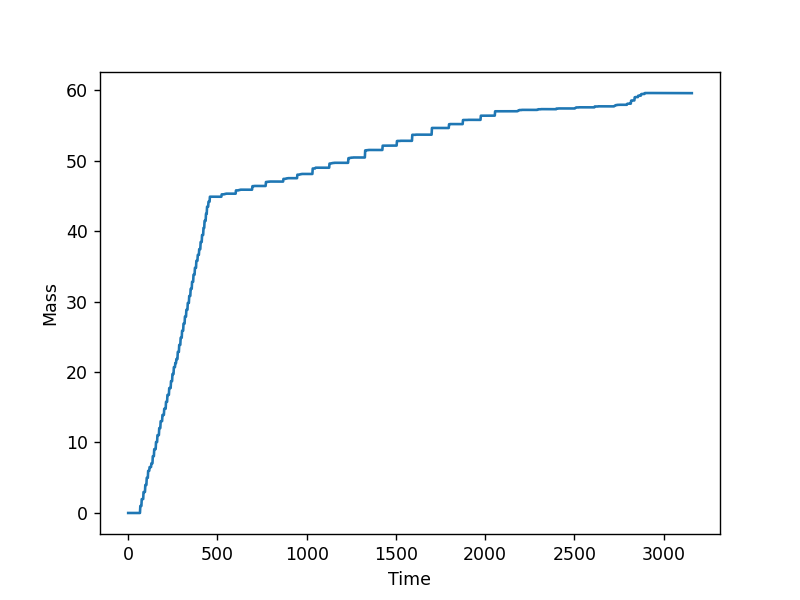

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_040923_S805-810.csv')